# В соответствии с вариантом задания сгенерировать экспериментальные данные, в которых в явном виде присутствует эффект мультиколлинеарности.
# Регрессия на 8 факторах. Эффект мультиколлинеарности создают две пары факторов. Имеется разброс в масштабах факторов.

# x1 = x2 + x8

# Так же разброс факторов:

# x1 [-4; 4]

# x2 [-3.5; 3.5]

# x3 [-3; 3]

# x4 [-2.5; 2.5]

# x5 [-2; 2]

# x6 [-1.5; 1.5]

# x7 [-1; 1]

# x8 [-0.5; 0.5]

In [20]:
import numpy as np
import scipy.stats as sps
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

Теперь задаём кол-во экспериментов и кол-во фактор + значение параметров в модели

In [21]:
n = 300 # Кол-во экспериментов
m = 8 # Кол-во факторов
teta = np.ones((m+1,1)) # +1 свободный член

Сама наша модель

In [22]:
def calc_u(x, teta):
 return x @ teta

Генерация массива признаков

In [23]:
x2 = np.random.uniform(-3.5, 3.5, n)
x3 = np.random.uniform(-3, 3, n)
x4 = np.random.uniform(-2.5, 2.5, n)
x5 = np.random.uniform(-2, 2, n)
x6 = np.random.uniform(-1.5, 1.5, n)
x7 = np.random.uniform(-1, 1, n)
x8 = np.random.uniform(-0.5, 0.5, n)

e_milty = np.random.normal(0, 0.1, n) #Что бы не было точной линеной зависимости добавляю ошибку
x1 = x2 + x8  + e_milty# Линейная зависимость от 2ух параметров

x0 = np.ones(n) # Свободный член
x = pd.DataFrame({'C' : x0,
                  'x1': x1,
                  'x2': x2,
                  'x3': x3,
                  'x4': x4,
                  'x5': x5,
                  'x6': x6,
                  'x7': x7,
                  'x8': x8})
df = x.copy()


Генерация значения сигнала

In [24]:
u = calc_u(x, teta)
df['u'] = u
df['u']

0      1.686367
1      2.995218
2      3.590496
3     -0.519939
4      0.312171
         ...   
295   -1.548549
296   -0.905887
297    8.122026
298   -7.823623
299    5.795945
Name: u, Length: 300, dtype: float64

Генерация значения отклика модели

In [25]:
p = 0.05 # мощность сигнала
u_avr = u.sum() / n
w_sq = ((u - u_avr).T @ (u - u_avr) / (n-1))[0][0]
d = w_sq * p
e = np.random.normal(0, d, (1, n)).T
y = u + e
df['y'] = y
df

,C,x1,x2,x3,x4,x5,x6,x7,x8,u,y
0,1.0,1.188732,1.179507,1.412399,-1.985216,-0.290944,-0.287095,-0.590512,0.059495,1.686367,3.196753
1,1.0,0.578905,0.385751,-1.299502,-0.584844,1.754295,1.499049,-0.473546,0.135109,2.995218,2.082348
2,1.0,-0.189644,-0.232599,1.904164,-0.390692,0.914506,0.869434,-0.304313,0.019641,3.590496,4.050633
3,1.0,0.964054,1.239726,-2.626494,0.405182,-1.980487,1.015787,-0.288732,-0.248975,-0.519939,0.827277
4,1.0,1.121626,1.244575,-2.907694,-0.664354,1.813278,-0.667487,-0.398097,-0.229675,0.312171,-1.812620
...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,-0.838751,-0.888260,1.980778,-1.095122,-1.756477,-0.225228,0.473178,-0.198666,-1.548549,-1.197593
296,1.0,-1.693031,-1.957987,2.723756,-0.522608,0.082285,-1.119263,0.299516,0.281446,-0.905887,-1.714637
297,1.0,2.872509,3.398934,-0.311614,-0.885843,1.007596,0.871086,0.541538,-0.372179,8.122026,9.449571
298,1.0,-3.217254,-3.391281,-2.605634,0.057911,-0.852108,1.069831,-0.023738,0.138652,-7.823623,-8.194165


# Рассчитать ряд показателей, характеризующих эффект мультиколлинеарности. Определить факторы, ответственные за возникновение эффекта мультиколлинеарности.

Сначала посчитаем определитель Информационной матрицы нормированной на её след

In [26]:
x

,C,x1,x2,x3,x4,x5,x6,x7,x8
0,1.0,1.188732,1.179507,1.412399,-1.985216,-0.290944,-0.287095,-0.590512,0.059495
1,1.0,0.578905,0.385751,-1.299502,-0.584844,1.754295,1.499049,-0.473546,0.135109
2,1.0,-0.189644,-0.232599,1.904164,-0.390692,0.914506,0.869434,-0.304313,0.019641
3,1.0,0.964054,1.239726,-2.626494,0.405182,-1.980487,1.015787,-0.288732,-0.248975
4,1.0,1.121626,1.244575,-2.907694,-0.664354,1.813278,-0.667487,-0.398097,-0.229675
...,...,...,...,...,...,...,...,...,...
295,1.0,-0.838751,-0.888260,1.980778,-1.095122,-1.756477,-0.225228,0.473178,-0.198666
296,1.0,-1.693031,-1.957987,2.723756,-0.522608,0.082285,-1.119263,0.299516,0.281446
297,1.0,2.872509,3.398934,-0.311614,-0.885843,1.007596,0.871086,0.541538,-0.372179
298,1.0,-3.217254,-3.391281,-2.605634,0.057911,-0.852108,1.069831,-0.023738,0.138652


In [27]:
info_x = x.T @ x
tr = np.trace(info_x)
print(tr)
info_x

4949.618709357385


,C,x1,x2,x3,x4,x5,x6,x7,x8
C,300.000000,5.669402,9.473733,-52.916073,-31.398607,19.059434,12.324174,-18.405008,-4.145555
x1,5.669402,1184.435304,1178.013967,-28.847929,-55.632515,16.197336,-24.983884,-4.393423,5.342948
x2,9.473733,1178.013967,1200.353845,-36.757188,-54.975965,15.367361,-28.235014,-2.655550,-20.065933
x3,-52.916073,-28.847929,-36.757188,857.651661,11.900354,5.568877,-18.559524,6.978871,8.811649
x4,-31.398607,-55.632515,-54.975965,11.900354,614.725503,38.150818,4.532094,-17.864556,0.627739
x5,19.059434,16.197336,15.367361,5.568877,38.150818,438.047398,13.365028,-11.014253,2.039395
x6,12.324174,-24.983884,-28.235014,-18.559524,4.532094,13.365028,210.618593,0.839436,2.393893
x7,-18.405008,-4.393423,-2.655550,6.978871,-17.864556,-11.014253,0.839436,118.452832,-1.520035
x8,-4.145555,5.342948,-20.065933,8.811649,0.627739,2.039395,2.393893,-1.520035,25.333574


Если определитель матрицы близок к нулю, то минимальное собственное значение тоже близко к нулю, а это значит, что матрица близка к вырожденной. Что говорит нам о наличии эффекта мультиколлиарности

In [28]:
info_norm_x = info_x / tr
det = np.linalg.det(info_norm_x)
det

8.889470253522492e-14

А теперь посчитаем минимальное собственное значение. Чем оно меньше тем сильнее эффект мультиколлиарности

In [29]:
l, v = np.linalg.eig(info_norm_x) # Находим собственные значения и собственные вектора
lmin = min(l)
index_lmin = np.where(l == lmin)
print(v[index_lmin])
lmax = max(l)
print("\nМинимальное собственное число: " + str(lmin)) 
print("\nМаксимальное собственное число: " + str(lmax)) 

[[-4.59347457e-03 -1.06198824e-02 -7.38367819e-04  4.05422159e-03
   1.22146402e-02  1.59100692e-02  2.59304751e-02  8.02756854e-01
  -5.95277962e-01]]

Минимальное собственное число: 0.00021624841936438582

Максимальное собственное число: 0.480109864105526


Вообще тут какие-то приколы пошлиЮ значения не особо сходятся (у тех, которые точно от 0 отличны с теми которые на самом деле входят в мультиколлиарность)

Мера обусловленности матрицы по Нейману-Голдстейну. Сравнивая эту меру с масштабом (опираясь на масштабы измерения факторов) можно судить о наличии или об отсутствии мультиколлиарности

In [30]:
print("\nМера обусловленности по Нейману-Голдстейну: " + str(lmax/lmin))


Мера обусловленности по Нейману-Голдстейну: 2220.177449235015


Максимальная парная сопряжённость - по идеи она расчитывается на основе similarity cosine (близость по косинусной метрике)

In [31]:
cosine_sim_x = cosine_similarity(info_x)
cosine_sim_x

array([[ 1.        ,  0.04450596,  0.04754035, -0.235549  , -0.15184193,
         0.09699453,  0.10475258, -0.20640009, -0.17945516],
       [ 0.04450596,  1.        ,  0.99979702, -0.07127897, -0.15844693,
         0.05686258, -0.18735212, -0.04103575, -0.30476515],
       [ 0.04754035,  0.99979702,  1.        , -0.07614709, -0.15809316,
         0.05622092, -0.18889414, -0.04034943, -0.32381372],
       [-0.235549  , -0.07127897, -0.07614709,  1.        ,  0.04260883,
         0.0140154 , -0.10001752,  0.07337078,  0.28896159],
       [-0.15184193, -0.15844693, -0.15809316,  0.04260883,  1.        ,
         0.13903261,  0.04899869, -0.16421618,  0.07292631],
       [ 0.09699453,  0.05686258,  0.05622092,  0.0140154 ,  0.13903261,
         1.        ,  0.08550456, -0.1342821 ,  0.05054505],
       [ 0.10475258, -0.18735212, -0.18889414, -0.10001752,  0.04899869,
         0.08550456,  1.        , -0.00483447,  0.10963564],
       [-0.20640009, -0.04103575, -0.04034943,  0.07337078, -0

In [32]:
mask = np.ones(cosine_sim_x.shape, dtype=bool) # маска для поиска максимального значения
np.fill_diagonal(mask, 0) # заполняю диагональ нулями
max_r = cosine_sim_x[mask].max()
print("\nМаксимальная парная сопряженность: " + "\t" + str(max_r))


Максимальная парная сопряженность: 	0.9997970196850802


а тут прям бинго! (2,8) - максимум!

Теперь посчитаем максимальную сопряжённость

In [33]:
Rii = np.diagonal(np.linalg.inv(cosine_sim_x))
R = 1 - Rii ** (-1)
max_R = R.max()
print("Максимальная сопряженность: " + "\t" + str(max_R) +"\n")
R

Максимальная сопряженность: 	0.9999987481946087



array([0.18828903, 0.99999873, 0.99999875, 0.34181489, 0.3506402 ,
       0.35720555, 0.19926852, 0.1078485 , 0.99726498])

Ну и напоследок: Определитель корреляционной матрицы

Когда гамма = 1, то тут точняк мультикорреляция!!!

In [34]:
info_x_cor = np.corrcoef(info_x)
det_i_x_c = np.linalg.det(info_x_cor)
gamma = 1 - abs(det_i_x_c)
print(gamma)

1.0


Примечание:

 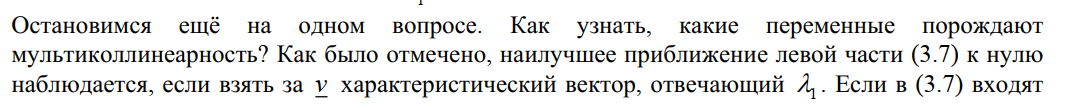

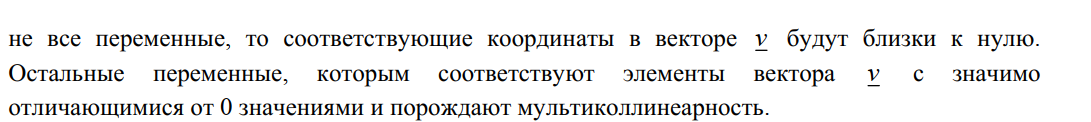

# Построить ридж-оценки параметров при различных значениях параметра регуляризации. Выбрать оптимальное значение параметра регуляризации. Построить графики изменения квадрата евклидовой нормы оценок параметров и остаточной суммы квадратов от параметра регуляризации

In [35]:
lyamda = 0 # Параматр регуляризации
step = 0.01 # Шаг
ar_lyam = [] # Параметры регуляризации
RSS = [] # Остаточные суммы квадратов
beta = [] # Квадраты евклидовой нормы
while lyamda < 0.1:
    D = np.diag(np.diagonal(info_x)) # Для вычисления нормы евклидова
    sq_D = np.sqrt(D)
    Z = x @ np.linalg.inv(sq_D) # Хз, вроде лишнее

    L = lyamda * D  # Вроде матрица сдвига или регуляризации
    teta_tilda = np.linalg.inv(info_x + L) @ x.T @ y # оценка параметров
    y_tilda = np.array(x) @ teta_tilda # Предсказание отклика
    RSS_cur = (y-y_tilda).T @ (y-y_tilda) # Остаточная сумма квадратов
    RSS.append(RSS_cur[0][0]) 
    cur_beta = np.linalg.norm(sq_D @ teta_tilda) # Текущая норма Евклида
    beta.append(cur_beta)
    ar_lyam.append(lyamda)
    lyamda += step
print(RSS_cur.shape)
RSS, min(beta), max(beta), beta[-1]

(1, 1)


([296.2939581967578,
  296.9280667555753,
  298.1522024074856,
  300.10180824929705,
  302.7498938372737,
  306.0617029544552,
  310.00265718192605,
  314.5395798996669,
  319.6409337916254,
  325.27682859400886,
  331.41896243532597],
 65.30691598129391,
 72.17294687168248,
 65.30691598129391)

Построим соответствующие графики

Сначала для RSS(lyamda)

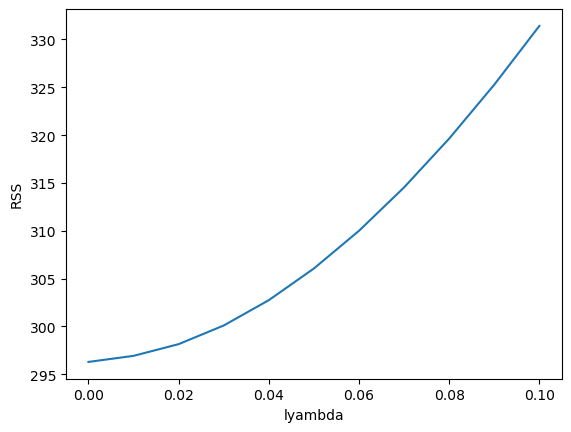

In [36]:
plt.plot(ar_lyam, RSS)
plt.xlabel('lyambda')
plt.ylabel('RSS')
plt.show()

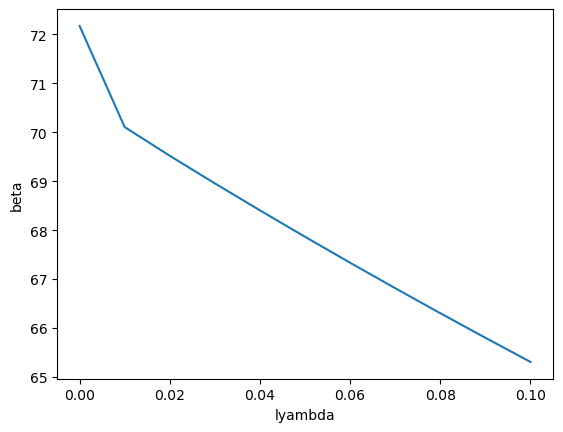

In [37]:
plt.plot(ar_lyam, beta)
plt.xlabel('lyambda')
plt.ylabel('beta')
plt.show()

Оптимальный параметр выбирается на глаз Ну тут при каждом запуске разные будут получаться графики, но то что я вижу - примерно 0.02 - норм параметр

 # Провести оценивание модели регрессии по методу главных компонентов. Перейти к описанию в исходном пространстве факторов. Сравнить решение с ридж-оцениванием по смещению оценок и точности предсказания отклика. функция от модуля взаимодействия первого и второго факторов. 

In [49]:
#получим х со звездочкой(центрированные переменные)
means = x.mean()
X_star = np.array([x['C'] - means['C'],
        x['x1'] - means['x1'], 
        x['x2'] - means['x2'], 
        x['x3'] - means['x3'], 
        x['x4'] - means['x4'], 
        x['x5'] - means['x5'], 
        x['x6'] - means['x6'], 
        x['x7'] - means['x7'], 
        x['x8'] - means['x8']])
X_star


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.16983413,  0.56000726, -0.20854212, ...,  2.85361109,
        -3.23615204,  2.49859598],
       [ 1.1479282 ,  0.35417155, -0.26417852, ...,  3.36735485,
        -3.42286032,  2.67265482],
       ...,
       [-0.32817566,  1.45796879,  0.8283539 , ...,  0.83000546,
         1.02874994,  0.22721487],
       [-0.52916157, -0.4121957 , -0.24296347, ...,  0.60288774,
         0.0376121 ,  0.93409884],
       [ 0.07331335,  0.14892747,  0.03345916, ..., -0.35836063,
         0.15247032, -0.11387557]])

In [50]:
#получим у со звездочкой
y_star = np.reshape(np.array([y - np.mean(y)]), (n, ))
y_star

array([  2.39252589,   1.27812163,   3.24640592,   0.02305049,
        -2.61684689,  -1.05077695,   4.75313039,  -8.8942154 ,
        -0.38348366,  -4.89598089,  -1.15743828,  -2.56757375,
         6.98684259,  -8.37353202,   2.00586848,  -1.8608209 ,
        -3.18367056,   1.09485121,  10.2733344 ,   3.68140253,
        -2.4918158 ,  -4.73765172,   2.05382019,  -3.896506  ,
        -1.0463371 ,  11.57718574,  -1.87245107,  -3.68437848,
        -2.36026045,   2.46956391,  -6.33987939,  -0.8145054 ,
         5.31738588,  -2.59491589,  -0.60525354,  -3.10360923,
        -1.94259891,  -1.87437099,   2.25217782,   9.92053699,
         8.82225091,   3.61232432,  -0.04063339,   4.96244952,
         0.86254113,  10.15094471,  -2.2029167 ,   3.77043443,
         1.73703172,  -1.4070265 , -13.06999847,  -4.50518901,
         0.73309735,   0.08377582,   1.0369072 ,  -0.41037713,
        -2.02274817,   5.76753446,  -8.90418459,   2.18810752,
        -0.96689726,   5.06728059,  -4.48305441,   1.43

**ВНИМАНИЕ** в следующем коде может присутствовать ошибка, а именно, я ориентировалась в том числе на бригаду Насти Хабаровой, а они в Z умножали на матрицу Х, хотя вроде в лекции написано Х*V, вот, не уверена, что здесь правильно, вероятно я где-то запуталась 

In [ ]:
cov_mat = np.cov(X_star)#наша ковариационная матрица
cov_values, cov_vectors = np.linalg.eig(cov_mat)#1 - массив с собств значениями ков матрицы, 2 - матрица, сод собств векторы
Z = x.values @ cov_vectors#матрица значений главных компонент(если что, если тут подставлять X_star - то не подойдет, а если X_star транпс, то то же самое) 
cov_values

array([7.94529939e+00, 2.83585238e+00, 3.57975859e-03, 1.27849841e-01,
       3.88961045e-01, 6.96741250e-01, 1.43115479e+00, 2.06784870e+00,
       0.00000000e+00])

In [59]:
#уберем значения некоторые
Z_new = np.delete(Z, (6, 7, 8), axis=1)#удаляем значения последние три столбца из Z 
cov_vectors_new = np.delete(cov_vectors, (6, 7, 8), axis=1)# удаляем три столбца из V 
b = np.linalg.inv((Z_new.T @ Z_new)) @ (Z_new.T @ y_star)# высчитываем вектор b 
theta_hat = cov_vectors_new @ b 
print(f"Вектор коэффициентов регресии для исходных факторов: {theta_hat}") 
norm_theta_hat = theta_hat.T @ theta_hat 
print(f"Норма этого вектора: {norm_theta_hat}") 

Вектор коэффициентов регресии для исходных факторов: [ 0.          0.70470664  1.24802153  1.07473485 -0.00875618 -0.00629563
  1.01285284  0.83596596  1.32140919]
Норма этого вектора: 6.680172689847785
